In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Credit-Card-Fraud-Detection/main/creditCardFraud_28011964_120214.csv")

In [3]:
df.columns
df.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean   167532.467532     1.589411     1.776224     1.604396    34.945055   
std    130587.921320     0.492187     0.750916     0.532298     9.219760   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    33.000000   
75%    240000.000000     2.000000     2.000000     2.000000    41.000000   
max    700000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean     -0.004995    -0.161838    -0.164835    -0.283716    -0.283716  ...   
std       1.173446     1.228732     1.262459     1.184662     1.170224  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       8.000000     7.000000     7.000000     7.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    40748.408591   39078.666334   38012.011988    5382.339660   
std     68206.929510   63108.238729   63074.415024   12180.755275   
min     -3684.000000  -28335.000000 -339603.000000       0.000000   
25%      1423.000000    1206.000000     830.000000    1000.000000   
50%     17710.000000   17580.000000   15846.000000    2184.000000   
75%     48851.000000   46404.000000   46557.000000    5090.000000   
max    628699.000000  484612.000000  473944.000000  199646.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean     5051.400599    4176.149850    4671.488511    5331.049950   
std     15626.153184   10514.647502   13269.943983   16812.536877   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     228.000000     148.000000     189.000000   
50%      1710.000000    1206.000000    1398.000000    1306.000000   
75%      4500.000000    3720.000000    4000.000000    3745.000000   
max    285138.000000  133657.000000  188840.000000  195599.000000   

            PAY_AMT6  default payment next month  
count    1001.000000                 1001.000000  
mean     5090.704296                    0.213786  
std     23658.888052                    0.410183  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%      1250.000000                    0.000000  
75%      3784.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [4]:
print("total null values =",np.sum(df.isnull().sum()))
print("total duplicated values =",np.sum(df.duplicated()))
print('------------------------------------------------')
print("skewness of the dataset =",df.skew())

total null values = 0
total duplicated values = 0
------------------------------------------------
skewness of the dataset = LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.03

In [5]:
x = df.drop('default payment next month',axis=1)
y = df['default payment next month']

In [6]:
x.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...      35835      20940      19146      19131      2000     36681   
1      0  ...      57608      19394      19619      20024      2500      1815   
2      0  ...     445007     542653     483003     473944     55000     40000   
3      0  ...        601        221       -159        567       380       601   
4      0  ...      12108      12211      11793       3719      3329         0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     10000      9000       689       679  
1       657      1000      1000       800  
2     38000     20239     13750     13770  
3         0       581      1687      1542  
4       432      1000      1000      1000  

[5 rows x 23 columns]

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
996     0
997     0
998     0
999     1
1000    1
Name: default payment next month, Length: 1001, dtype: int64

<Axes: >

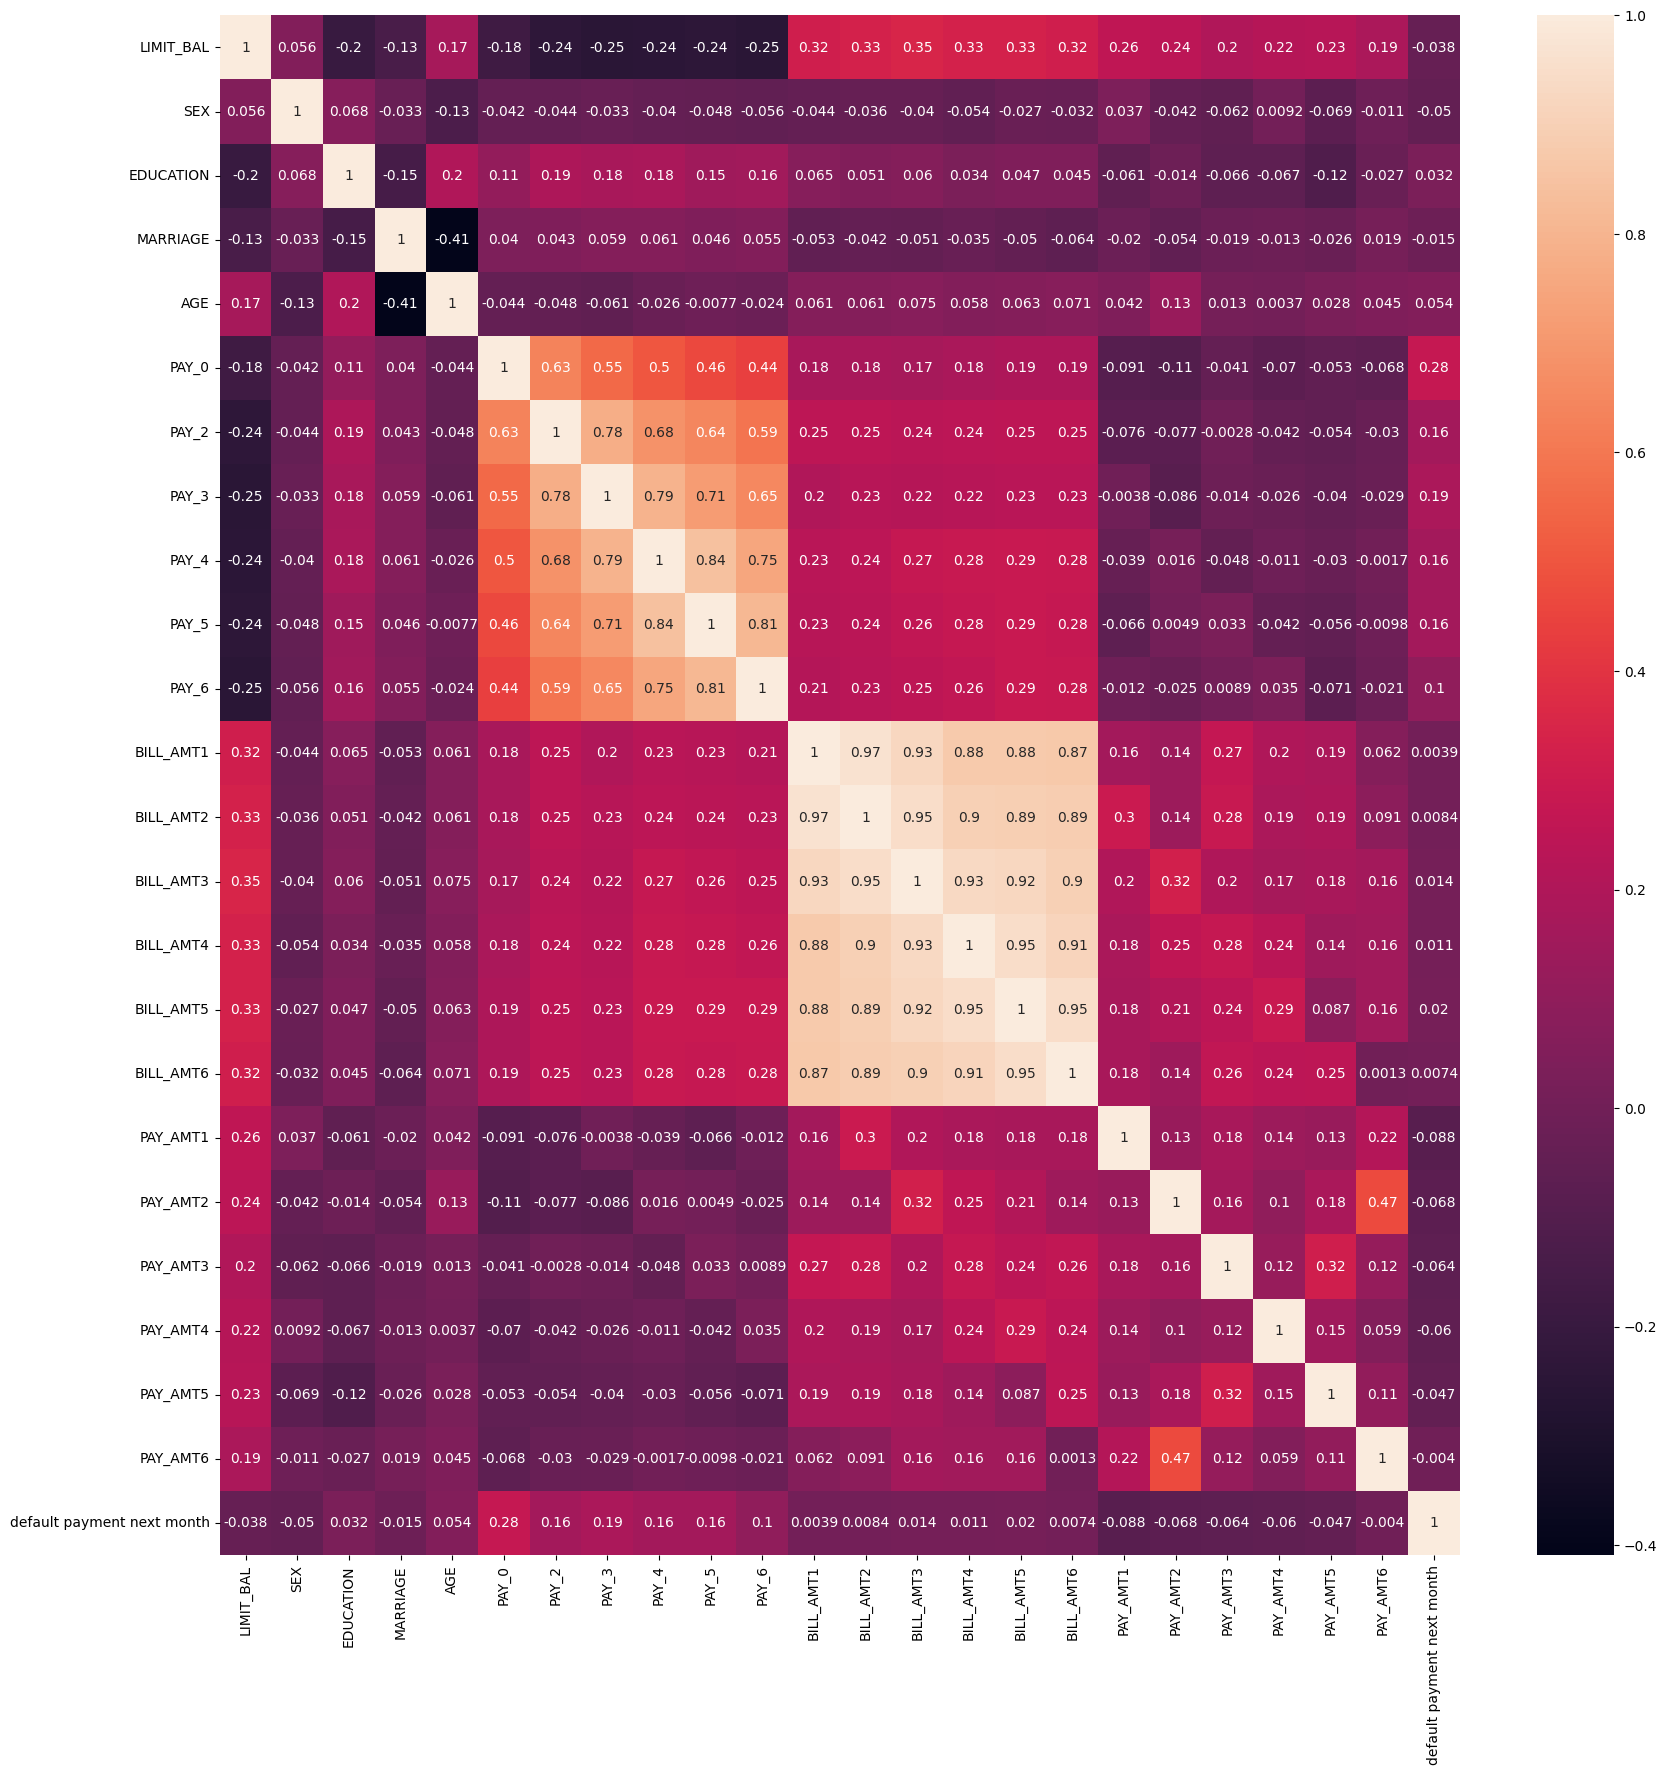

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

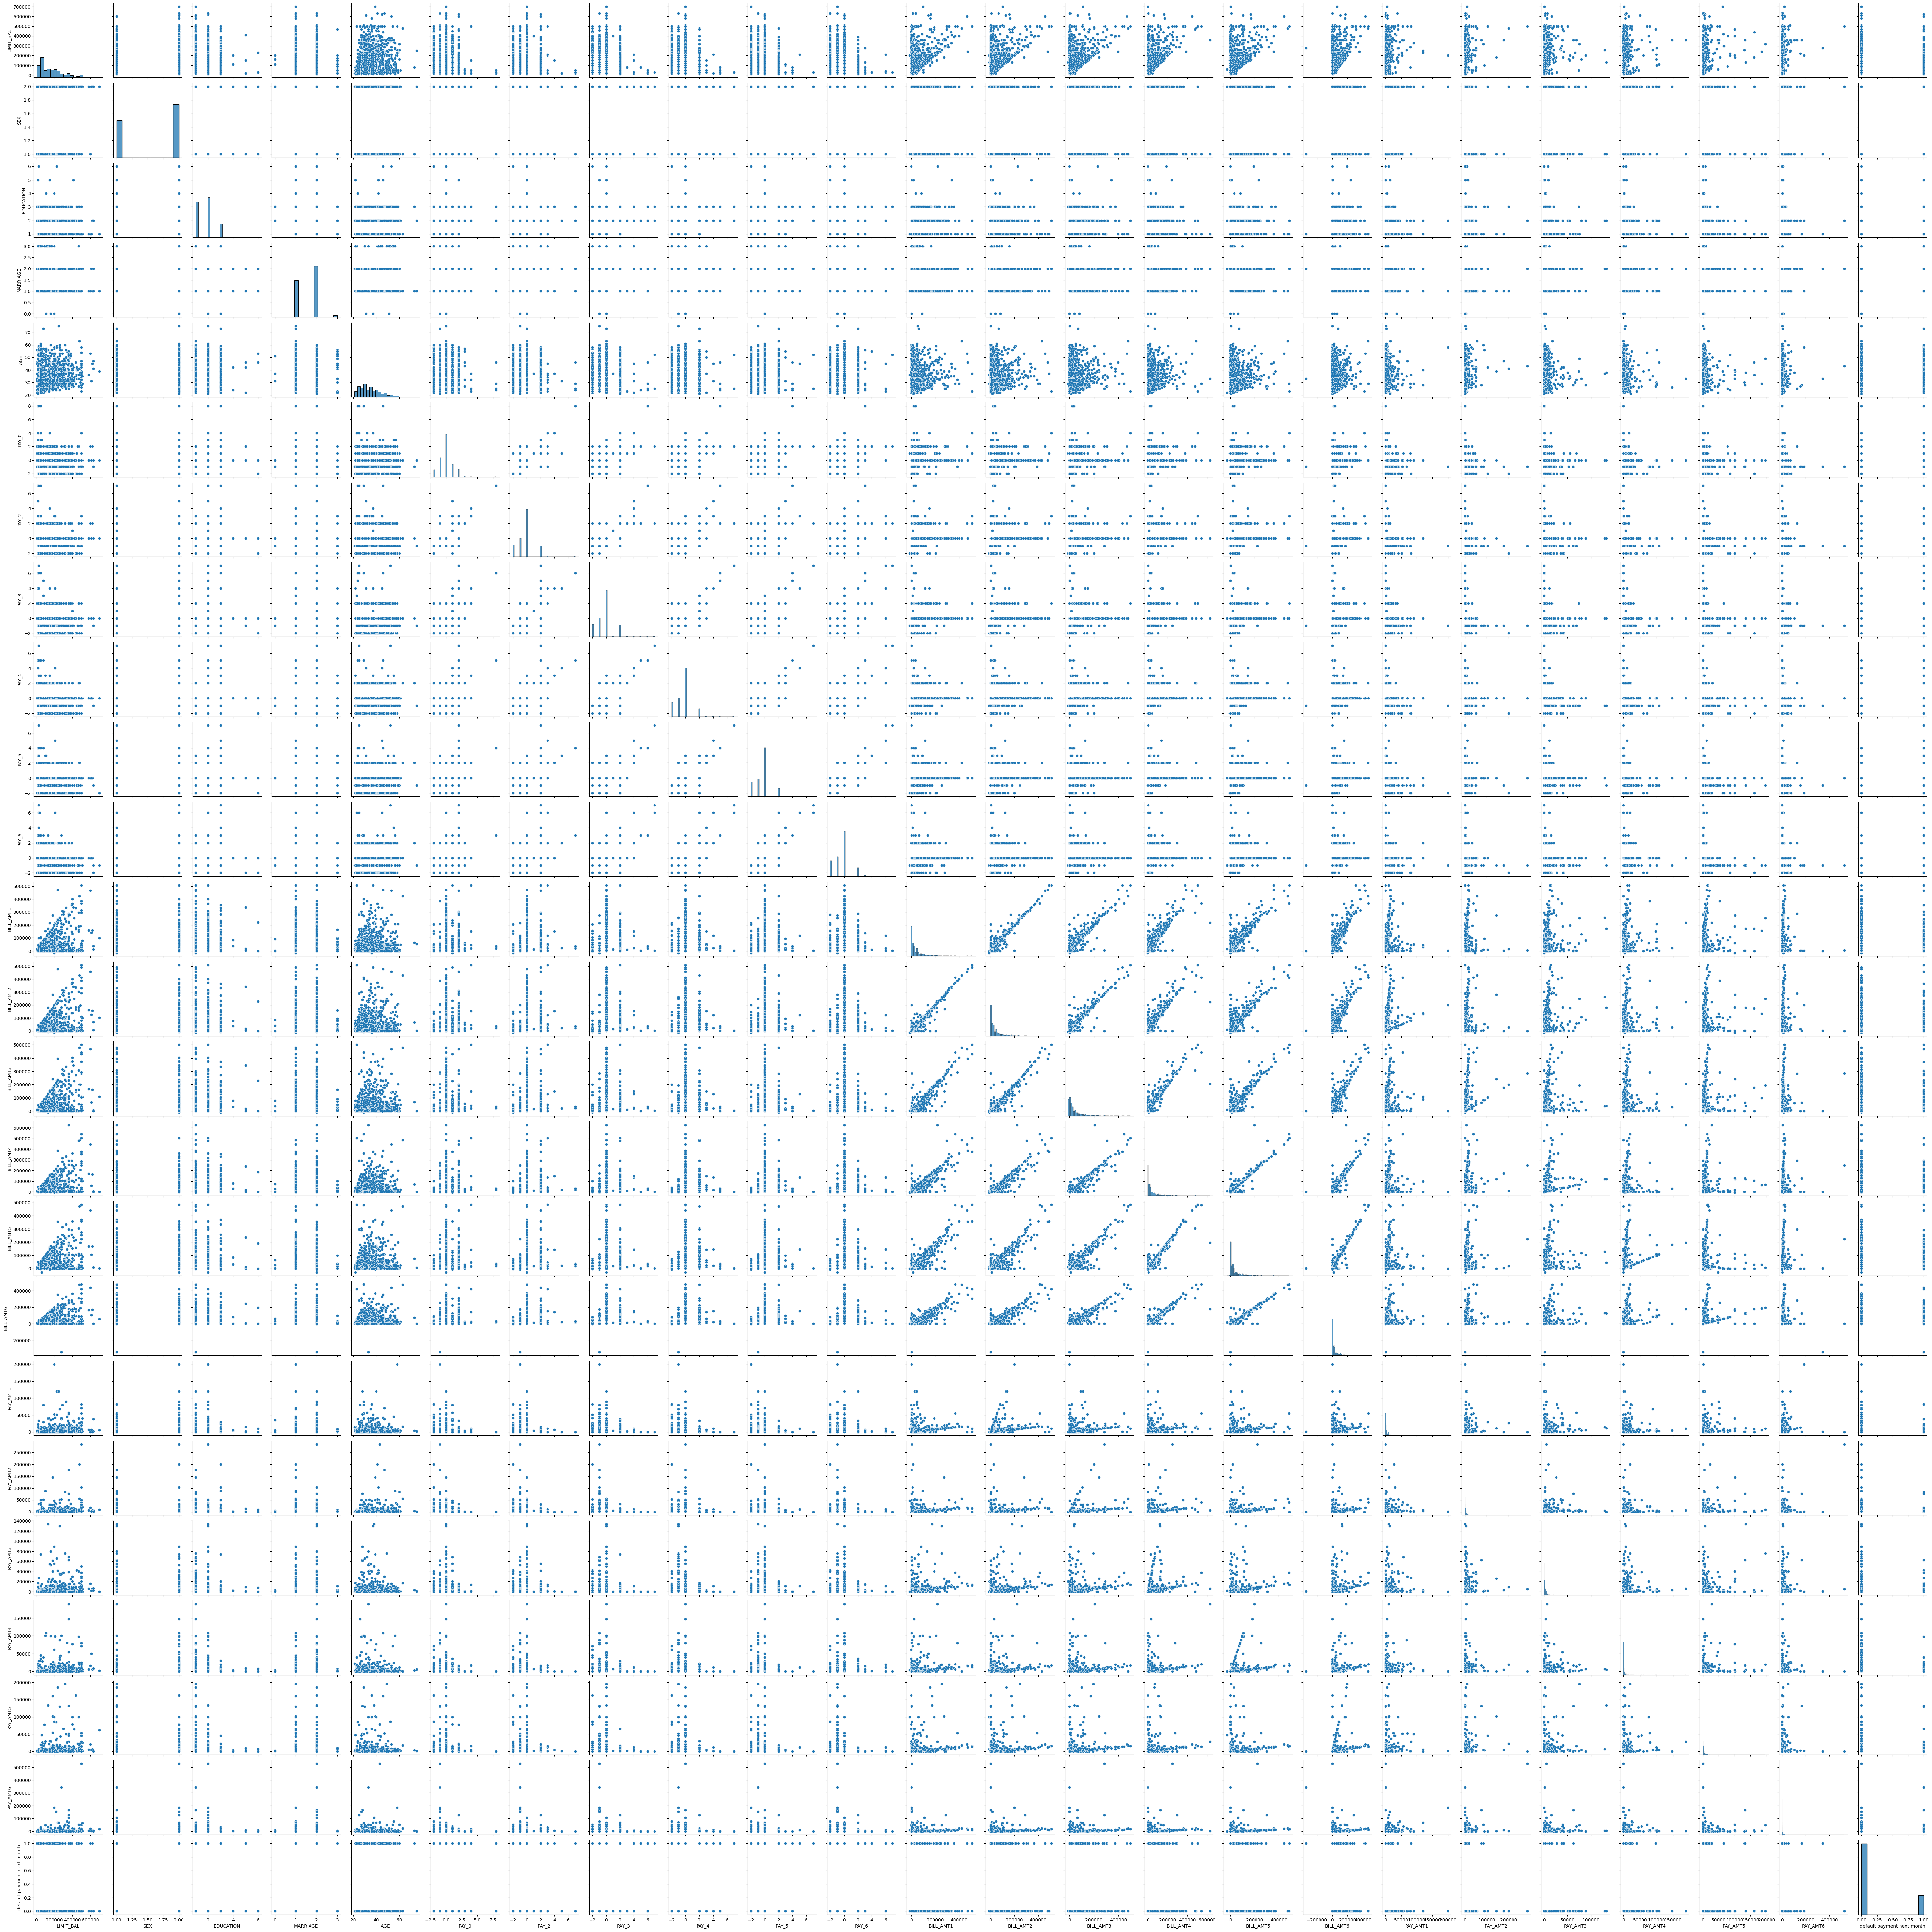

In [20]:
sns.pairplot(df)

<Axes: >

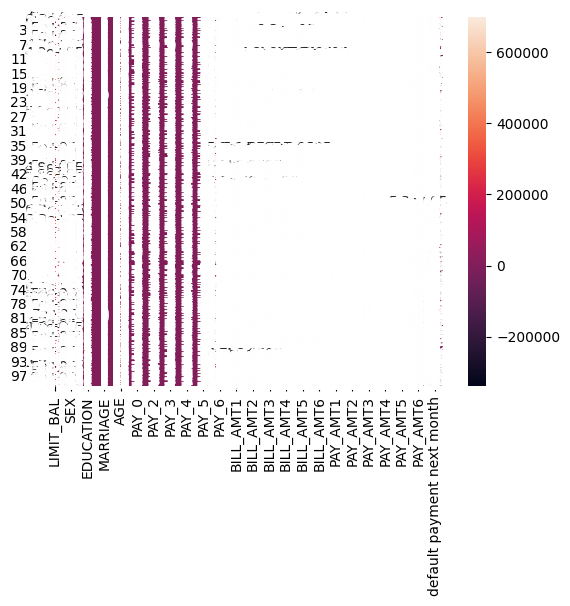

In [9]:
sns.heatmap(df, annot=True)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [11]:
x_train.shape

(850, 23)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train

array([[ 0.91848642, -1.20986285,  1.59802806, ..., -0.35095931,
        -0.28532932, -0.1873554 ],
       [-0.90012204,  0.82653997, -1.03183419, ..., -0.35095931,
        -0.31069168, -0.20231024],
       [ 3.11597164,  0.82653997, -1.03183419, ...,  0.09852977,
         0.04270259,  0.03866935],
       ...,
       [ 0.23650825, -1.20986285, -1.03183419, ..., -0.22178546,
        -0.13081676, -0.10099019],
       [-0.67279598,  0.82653997, -1.03183419, ...,  2.64264098,
        -0.20276673, -0.13341261],
       [-0.67279598,  0.82653997,  0.28309694, ..., -0.2648933 ,
        -0.24173963, -0.16036374]])

In [14]:
scale_train = pd.DataFrame(x_train,columns=x.columns)
scale_test = pd.DataFrame(x_test,columns=x.columns)

In [15]:
scale_train

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0     0.918486 -1.209863   1.598028 -1.120494  1.290763 -0.856018 -0.672695   
1    -0.900122  0.826540  -1.031834  0.765486 -0.216013 -0.856018  1.739923   
2     3.115972  0.826540  -1.031834 -1.120494  0.106867 -0.007982  0.131511   
3     0.539610  0.826540   0.283097 -1.120494  0.214494 -0.007982  0.131511   
4     0.388059 -1.209863  -1.031834  0.765486  0.322121 -0.007982  0.131511   
..         ...       ...        ...       ...       ...       ...       ...   
845   1.221588  0.826540  -1.031834 -1.120494 -0.431267 -0.007982  0.131511   
846   1.448914  0.826540   0.283097  0.765486 -0.754148 -1.704055 -1.476901   
847   0.236508 -1.209863  -1.031834  0.765486 -0.323640 -0.007982  0.131511   
848  -0.672796  0.826540  -1.031834  0.765486 -1.292282 -0.007982  0.131511   
849  -0.672796  0.826540   0.283097 -1.120494  0.106867 -0.856018 -0.672695   

        PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   -0.655769 -0.606973  0.240712  ...  -0.634407  -0.584731  -0.607906   
1   -0.655769 -0.606973 -0.615376  ...  -0.188392  -0.435886  -0.614081   
2    0.133755  0.238809  0.240712  ...   1.711765   1.862707   2.017345   
3    0.133755  0.238809  0.240712  ...   2.019159   2.106256   2.374787   
4    0.133755  0.238809  0.240712  ...   2.371910   2.576672   2.001564   
..        ...       ...       ...  ...        ...        ...        ...   
845  1.712802  0.238809  0.240712  ...   0.854829   0.941228   1.046451   
846 -1.445293 -1.452754 -1.471463  ...  -0.640013  -0.596229  -0.614081   
847  0.133755  0.238809  0.240712  ...   0.005156   0.115500   0.125955   
848  0.133755  0.238809  0.240712  ...   0.178318  -0.049722   0.106869   
849 -0.655769 -0.606973 -0.615376  ...  -0.593622  -0.548042  -0.596149   

     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    -0.587552 -0.398606 -0.287387 -0.319463 -0.350959 -0.285329 -0.187355  
1    -0.594186 -0.426931  1.608783  0.623852 -0.350959 -0.310692 -0.202310  
2     2.040003  0.079499  0.082587  0.153616  0.098530  0.042703  0.038669  
3     2.414075  0.215091  0.176025  0.222299  0.397441  0.150987  0.040858  
4     1.998223  0.276818  0.138662  0.433208  0.152639  0.049058  0.081751  
..         ...       ...       ...       ...       ...       ...       ...  
845   1.088433  0.304666 -0.311137 -0.062612 -0.044115  0.636290 -0.202310  
846  -0.594186 -0.430025 -0.311137 -0.392089 -0.350959 -0.310692 -0.202310  
847   0.184729 -0.292052 -0.205824 -0.147985 -0.221785 -0.130817 -0.100990  
848   0.144643 -0.175184 -0.215180 -0.304424  2.642641 -0.202767 -0.133413  
849  -0.576150 -0.203032 -0.114485 -0.087738 -0.264893 -0.241740 -0.160364  

[850 rows x 23 columns]

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_nb = GaussianNB()
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()

In [17]:
model_nb.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred_nb = model_nb.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_dt = model_dt.predict(x_test)

In [19]:
print("Naive Bayes Model","Accuracy Score =",accuracy_score(y_test,y_pred_nb)) 
print("Random Forest Model","Accuracy Score =",accuracy_score(y_test,y_pred_rf))
print("Decision Tree Model","Accuracy Score =",accuracy_score(y_test,y_pred_dt))


Naive Bayes Model Accuracy Score = 0.7615894039735099
Random Forest Model Accuracy Score = 0.8807947019867549
Decision Tree Model Accuracy Score = 0.7880794701986755
